In [ ]:
Data Source: https://www.kaggle.com/datasets/shubh0799/churn-modelling

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('D:\Churn_Modelling.csv')

In [5]:
df.shape

(10000, 14)

In [6]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df=df.drop(df.columns[0:2], axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Surname          10000 non-null  object 
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           10000 non-null  object 
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


In [9]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
df=df.drop(df.columns[0], axis=1)

In [11]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
for i in df.columns:
    print(i, ':', len(df[i].value_counts()))

CreditScore : 460
Geography : 3
Gender : 2
Age : 70
Tenure : 11
Balance : 6382
NumOfProducts : 4
HasCrCard : 2
IsActiveMember : 2
EstimatedSalary : 9999
Exited : 2


# Geography

In [13]:
##Số người tham gia khảo sát theo quốc gia
df_geo=df.groupby(by='Geography').count()['Exited']
df_geo

Geography
France     5014
Germany    2509
Spain      2477
Name: Exited, dtype: int64

Pháp là nước có số lượng tham gia khảo sát nhiều nhất

In [14]:
##Số người rời bỏ sd dịch vụ theo quốc gia
df_exited=df[df.Exited==1].groupby(by='Geography').count()['Exited']
df_exited

Geography
France     810
Germany    814
Spain      413
Name: Exited, dtype: int64

Đức có số lượng người rời bỏ cao nhất.

In [15]:
##tỷ lệ rời bỏ
Ratio=df_exited/df_geo
Ratio

Geography
France     0.161548
Germany    0.324432
Spain      0.166734
Name: Exited, dtype: float64

Đức là nước có tỷ lệ rời bỏ cao nhất

In [16]:
##số dư trung bình
df_bal=df.groupby(by='Geography').sum()['Balance']
bal = df_bal/df_geo
bal

Geography
France      62092.636516
Germany    119730.116134
Spain       61818.147763
dtype: float64

Đức có tỷ lệ exited cao nhất và số dư trung bình cao nhất nên có thể nói rằng, số dư trong tài khoản không ảnh hưởng đến việc ngừng sử dụng dịch vụ của khách hàng.

In [17]:
df_geogen=df.groupby(by=['Geography','Gender','Exited']).agg('count')
df_geogen=df_geogen.rename(columns={"CreditScore":"Count"})
df_gengen=df_geogen.reset_index(inplace=True, drop=False)
df_geogen=df_geogen[df_geogen['Exited']==1].iloc[:,:4]
df_geogen

,Geography,Gender,Exited,Count
1,France,Female,1,460
3,France,Male,1,350
5,Germany,Female,1,448
7,Germany,Male,1,366
9,Spain,Female,1,231
11,Spain,Male,1,182


In [18]:
df_geogen['Geogen']=df_geogen['Geography']+'-'+ df_geogen['Gender']
df_geogen

,Geography,Gender,Exited,Count,Geogen
1,France,Female,1,460,France-Female
3,France,Male,1,350,France-Male
5,Germany,Female,1,448,Germany-Female
7,Germany,Male,1,366,Germany-Male
9,Spain,Female,1,231,Spain-Female
11,Spain,Male,1,182,Spain-Male


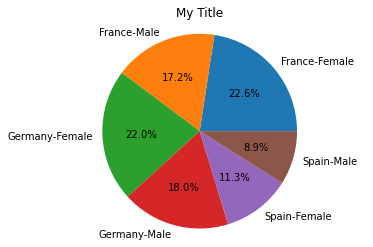

In [19]:
my_labels=df_geogen['Geogen']
my_data=df_geogen['Count']
plt.pie(my_data, labels=my_labels, autopct='%1.1f%%')
plt.title('My Title')
plt.axis('equal')
plt.show()

Có thể thấy, ở cả 3 quốc gia, tỷ lệ nữ giới rời bỏ đều cao hơn nam giới cho thấy nữ giới có xu hướng rời bỏ sử dụng dịch vụ cao hơn nam giới. Trong đó, nữ giới ở Pháp có tỷ lệ rời bỏ cao nhất, sau đó đến Đức. Ở nam giới, tỷ lệ rời bỏ của Đức lại ở mức cao hơn.

# Age

In [20]:
##Tỷ lệ rời bỏ theo độ tuổi
df_inex = df[df['Exited']==0][['Age', 'Exited']]
df_inex=df_inex.rename(columns={'Exited':'Inexited'})
df_inex_age=df_inex.groupby('Age').agg('count')
df_inex_age.reset_index(drop=False, inplace=True)

df_ex= df[df['Exited']==1][['Age', 'Exited']]
df_ex_age=df_ex.groupby("Age").agg('count')
df_ex_age.reset_index(drop=False,inplace=True)
df_ex_age

age_df=pd.merge(df_inex_age,df_ex_age, how='outer', left_on='Age', right_on='Age')
age_df=age_df.fillna(value=0)
age_df['Ratio']=age_df['Exited']/(age_df['Exited']+age_df['Inexited'])*100
age_df

,Age,Inexited,Exited,Ratio
0,18,20,2.0,9.090909
1,19,26,1.0,3.703704
2,20,38,2.0,5.000000
3,21,50,3.0,5.660377
4,22,72,12.0,14.285714
...,...,...,...,...
65,83,1,0.0,0.000000
66,84,1,1.0,50.000000
67,85,1,0.0,0.000000
68,88,1,0.0,0.000000


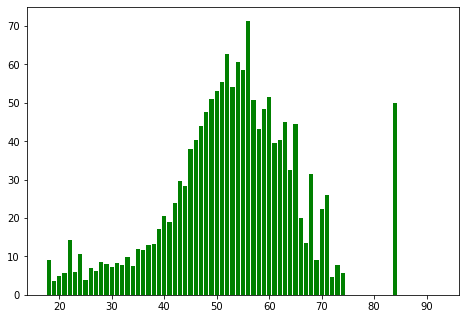

In [21]:
##Tỷ lệ rời bỏ theo độ tuổi
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x=age_df['Age']
y=age_df['Ratio']
ax.bar(x,y,color='g')
plt.show()

- Tuổi có tỷ lệ Exited cao nhất là 56, sau đó là 52.
- Những người trong độ tuổi từ 45 đến 65 có tỷ lệ Exited cao, đều trên 30%.
- Độ tuổi 84 có tỷ lệ rời bỏ là 50%, tuy nhiên khi xem lại dữ liệu, cho thấy chỉ có 1 người rời bỏ.

In [22]:
##Tỷ lệ người trong độ tuổi 45-65 của mỗi quốc gia
def age(geo):
    return len(df[(df["Geography"]==str(geo))&(df['Age']>=45)&(df['Age']<=65)])/len(df[df["Geography"]==str(geo)])
for i in df.Geography.unique():
    print ( i,":", age(i))

France : 0.1888711607499003
Spain : 0.20387565603552685
Germany : 0.24870466321243523


Đức là nước có số lượng người trong độ tuổi 45-65 cao nhất, đây có thể là 1 trong những lí do khiến Đức có tỷ lệ rời bỏ cao nhất.

# Tenure

In [23]:
##Tỷ lệ rời bỏ theo số năm sử dụng dịch vụ
df_ten_ex=df[df["Exited"]==1].groupby('Tenure').agg('count')
df_ten_ex.reset_index(inplace=True, drop=False)
df_ten_ex=df_ten_ex[['Tenure','Exited']]

df_ten_inex=df[df["Exited"]==0].groupby('Tenure').agg('count')
df_ten_inex.reset_index(inplace=True, drop=False)
df_ten_inex=df_ten_inex[['Tenure','Exited']]
df_ten_inex=df_ten_inex.rename(columns={'Exited':'Inexited'})

df_ten=pd.merge(df_ten_ex,df_ten_inex, how='outer', left_on='Tenure', right_on='Tenure')
df_ten['ratio']=df_ten['Exited']/(df_ten["Exited"]+df_ten['Inexited'])*100
df_ten

,Tenure,Exited,Inexited,ratio
0,0,95,318,23.002421
1,1,232,803,22.415459
2,2,201,847,19.179389
3,3,213,796,21.110010
4,4,203,786,20.525784
5,5,209,803,20.652174
6,6,196,771,20.268873
7,7,177,851,17.217899
8,8,197,828,19.219512
9,9,213,771,21.646341


<BarContainer object of 11 artists>

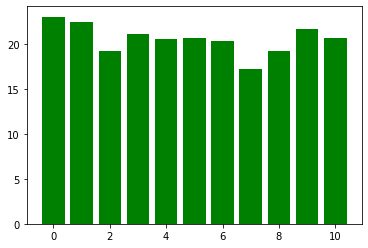

In [24]:
tenure=df_ten['Tenure']
ratio=df_ten['ratio']
plt.bar(tenure,ratio,color='g')

Có thể thấy, số năm sử dụng dịch vụ không ảnh hưởng quá nhiều đến tỷ lệ rời bỏ. Những người có từ 8-10 năm sử dụng dịch vụ vẫn có tỷ lệ từ bỏ không quá chênh lệch với những người có số năm sử dụng ít hơn.

In [25]:
##tỷ lệ rời bỏ theo số năm sử dụng dịch vụ của nước Pháp
df1=df[df["Geography"]=='France']
df1
df_ten_ex_f=df1[df1["Exited"]==1].groupby('Tenure').agg('count')
df_ten_ex_f.reset_index(inplace=True, drop=False)
df_ten_ex_f=df_ten_ex_f[['Tenure','Exited']]

df_ten_inex_f=df1[df1["Exited"]==0].groupby('Tenure').agg('count')
df_ten_inex_f.reset_index(inplace=True, drop=False)
df_ten_inex_f=df_ten_inex_f[['Tenure','Exited']]
df_ten_inex_f=df_ten_inex_f.rename(columns={'Exited':'Inexited'})

df_ten_f=pd.merge(df_ten_ex_f,df_ten_inex_f, how='outer', left_on='Tenure', right_on='Tenure')
df_ten_f['ratio']=df_ten_f['Exited']/(df_ten_f["Exited"]+df_ten_f['Inexited'])*100
df_ten_f

,Tenure,Exited,Inexited,ratio
0,0,35,170,17.073171
1,1,83,446,15.689981
2,2,90,435,17.142857
3,3,83,408,16.904277
4,4,85,427,16.601562
5,5,76,409,15.670103
6,6,77,426,15.308151
7,7,76,476,13.768116
8,8,69,396,14.838710
9,9,88,416,17.460317


<BarContainer object of 11 artists>

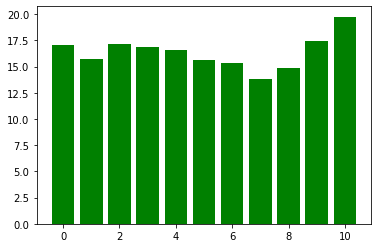

In [26]:
tenure1=df_ten_f['Tenure']
ratio1=df_ten_f['ratio']
plt.bar(tenure1,ratio1,color='g')

In [27]:
##tỷ lệ rời bỏ theo số năm sử dụng dịch vụ của nước Đức
df2=df[df["Geography"]=='Germany']
df2
df_ten_ex_g=df2[df2["Exited"]==1].groupby('Tenure').agg('count')
df_ten_ex_g.reset_index(inplace=True, drop=False)
df_ten_ex_g=df_ten_ex_g[['Tenure','Exited']]

df_ten_inex_g=df2[df2["Exited"]==0].groupby('Tenure').agg('count')
df_ten_inex_g.reset_index(inplace=True, drop=False)
df_ten_inex_g=df_ten_inex_g[['Tenure','Exited']]
df_ten_inex_g=df_ten_inex_g.rename(columns={'Exited':'Inexited'})

df_ten_g=pd.merge(df_ten_ex_g,df_ten_inex_f, how='outer', left_on='Tenure', right_on='Tenure')
df_ten_g['ratio']=df_ten_g['Exited']/(df_ten_g["Exited"]+df_ten_g['Inexited'])*100
df_ten_g

,Tenure,Exited,Inexited,ratio
0,0,36,170,17.475728
1,1,105,446,19.056261
2,2,64,435,12.825651
3,3,84,408,17.073171
4,4,76,427,15.109344
5,5,90,409,18.036072
6,6,76,426,15.139442
7,7,61,476,11.359404
8,8,87,396,18.012422
9,9,93,416,18.271120


<BarContainer object of 11 artists>

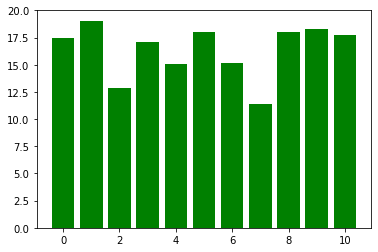

In [28]:
tenure2=df_ten_g['Tenure']
ratio2=df_ten_g['ratio']
plt.bar(tenure2,ratio2,color='g')

In [29]:
##tỷ lệ rời bỏ theo số năm sử dụng dịch vụ của nước TBN
df3=df[df["Geography"]=='Spain']
df3
df_ten_ex_s=df3[df3["Exited"]==1].groupby('Tenure').agg('count')
df_ten_ex_s.reset_index(inplace=True, drop=False)
df_ten_ex_s=df_ten_ex_s[['Tenure','Exited']]
df_ten_inex_s=df3[df3["Exited"]==0].groupby('Tenure').agg('count')
df_ten_inex_s.reset_index(inplace=True, drop=False)
df_ten_inex_s=df_ten_inex_s[['Tenure','Exited']]
df_ten_inex_s=df_ten_inex_s.rename(columns={'Exited':'Inexited'})
df_ten_s=pd.merge(df_ten_ex_s,df_ten_inex_s, how='outer', left_on='Tenure', right_on='Tenure')
df_ten_s['ratio']=df_ten_s['Exited']/(df_ten_s["Exited"]+df_ten_s['Inexited'])*100
df_ten_s

,Tenure,Exited,Inexited,ratio
0,0,24,79,23.300971
1,1,44,198,18.181818
2,2,47,201,18.951613
3,3,46,211,17.898833
4,4,42,203,17.142857
5,5,43,225,16.044776
6,6,43,194,18.143460
7,7,40,211,15.936255
8,8,41,255,13.851351
9,9,32,179,15.165877


<BarContainer object of 11 artists>

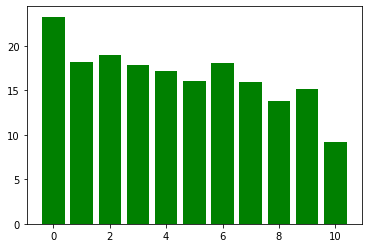

In [30]:
tenure3=df_ten_s['Tenure']
ratio3=df_ten_s['ratio']
plt.bar(tenure3,ratio3,color='g')

Ở cả 3 quốc gia thì số năm sử dụng dịch vụ cao cũng không làm giảm tỷ lệ rời bỏ. Tuy nhiên, ở năm số 7 tại cả 3 nước, tỷ lệ rời bỏ lại thấp hơn hẳn, năm số 2 ở Đức và TBN cũng thế.

# Balance

(array([3.623e+03, 6.900e+01, 3.600e+02, 1.173e+03, 2.081e+03, 1.747e+03,
        7.290e+02, 1.860e+02, 3.000e+01, 2.000e+00]),
 array([     0.   ,  25089.809,  50179.618,  75269.427, 100359.236,
        125449.045, 150538.854, 175628.663, 200718.472, 225808.281,
        250898.09 ]),
 <BarContainer object of 10 artists>)

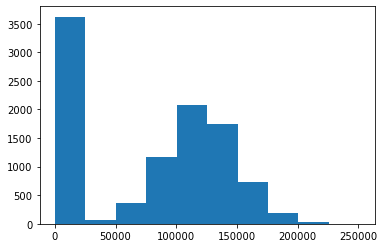

In [31]:
plt.hist(df["Balance"])

In [32]:
##Phân nhóm theo số dư
def group(balance):
    if int(balance) == 0:
        return 0
    elif int(balance) in range(1,50000):
        return 1
    elif int(balance) in range(50000, 100000):
        return 2
    elif int(balance) in range(100000, 150000):
        return 3
    elif int(balance) in range(150000, 200000):
        return 4
    else:
        return 5

In [33]:
df["Group_balance"]=df["Balance"].map(group)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Group_balance
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,2
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,4
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,2
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,0
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,2


In [34]:
##Tỷ lệ rời bỏ theo số dư
df_bal_ex=df[df['Exited']==1].groupby('Group_balance').agg('count')
df_bal_ex.reset_index(inplace=True, drop=False)
df_bal_ex=df_bal_ex[['Group_balance','Exited',]]

df_bal_inex=df[df['Exited']==0].groupby('Group_balance').agg('count')
df_bal_inex.reset_index(inplace=True, drop=False)
df_bal_inex=df_bal_inex[['Group_balance','Exited',]]
df_bal_inex=df_bal_inex.rename(columns={'Exited':'Inexited'})

df_bal=pd.merge(df_bal_ex, df_bal_inex, how='outer', on='Group_balance')
df_bal['ratio']=df_bal['Exited']/(df_bal['Exited']+df_bal['Inexited'])*100
df_bal

,Group_balance,Exited,Inexited,ratio
0,0,500,3117,13.823611
1,1,26,49,34.666667
2,2,300,1209,19.880716
3,3,987,2843,25.770235
4,4,205,730,21.925134
5,5,19,15,55.882353


<BarContainer object of 6 artists>

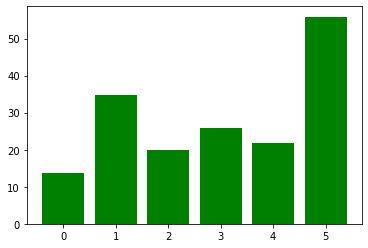

In [35]:
Bal=df_bal['Group_balance']
Ratio_bal=df_bal['ratio']
plt.bar(Bal,Ratio_bal,color='g')

Nhóm có số dư tài khoản lớn nhất lại có tỷ lệ rời bỏ cao nhất, giống với kết quả phân tích ở trên, số dư trong tài khoản càng lớn không đồng nghĩa với việc người đó sẽ không rời bỏ sử dụng dịch vụ.

# Number of products

In [36]:
df_pr=df.groupby(by=['Exited', 'NumOfProducts']).agg('count')
df_pr.reset_index(inplace=True, drop=False)
df_pr=df_pr[['NumOfProducts','Exited','Age']]
df_pr=df_pr.rename(columns={"Age":'Num'})
df_pr

,NumOfProducts,Exited,Num
0,1,0,3675
1,2,0,4242
2,3,0,46
3,1,1,1409
4,2,1,348
5,3,1,220
6,4,1,60


<AxesSubplot:xlabel='NumOfProducts', ylabel='Num'>

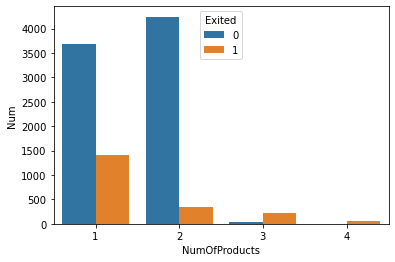

In [37]:
sns.barplot(data=df_pr, x='NumOfProducts',y='Num',hue="Exited")

# Has Credit Card

In [38]:
##tỷ lệ rời bỏ của người có Credit Card
df_has_ex=df[df["Exited"]==1].groupby('HasCrCard').agg('count')
df_has_ex.reset_index(inplace=True, drop=False)
df_has_ex=df_has_ex[["HasCrCard",'Exited',]]

df_has_inex=df[df["Exited"]==0].groupby('HasCrCard').agg('count')
df_has_inex.reset_index(inplace=True, drop=False)
df_has_inex=df_has_inex[["HasCrCard",'Exited',]]
df_has_inex=df_has_inex.rename(columns={'Exited':'Inexited'})

df_has=pd.merge(df_has_ex, df_has_inex, how='outer', on='HasCrCard')
df_has['ratio']=df_has['Exited']/(df_has['Exited']+df_has['Inexited'])*100
df_has

,HasCrCard,Exited,Inexited,ratio
0,0,613,2332,20.814941
1,1,1424,5631,20.184266


Tỷ lệ rời bỏ của nhóm khách hàng có và không có Credit Card không chênh lệch quá lớn, cho thấy có hay không có thẻ tín dụng không tác động nhiều đến việc rời bỏ sddv.

# Is Active Member

In [39]:
##Tỷ lệ rời bỏ theo trạng thái hoạt động
df_ac_ex=df[df["Exited"]==1].groupby('IsActiveMember').agg('count')
df_ac_ex.reset_index(inplace=True, drop=False)
df_ac_ex=df_ac_ex[["IsActiveMember",'Exited',]]

df_ac_inex=df[df["Exited"]==0].groupby('IsActiveMember').agg('count')
df_ac_inex.reset_index(inplace=True, drop=False)
df_ac_inex=df_ac_inex[["IsActiveMember",'Exited',]]
df_ac_inex=df_ac_inex.rename(columns={'Exited':'Inexited'})

df_ac=pd.merge(df_ac_ex, df_ac_inex, how='outer', on='IsActiveMember')
df_ac['ratio']=df_ac['Exited']/(df_ac['Exited']+df_ac['Inexited'])*100
df_ac

,IsActiveMember,Exited,Inexited,ratio
0,0,1302,3547,26.850897
1,1,735,4416,14.269074


Tỷ lệ rời bỏ của nhóm hoạt động tích cực thấp hơn nhóm không hoạt động tích cực.

# Estimated Salary

In [41]:
##Phân nhóm theo lương
def group(salary):
    if int(salary) in range(1,50000):
        return 1
    elif int(salary) in range(50000, 100000):
        return 2
    elif int(salary) in range(100000, 150000):
        return 3
    else:
        return 4

In [42]:
df["Group_salary"]=df["EstimatedSalary"].map(group)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Group_balance,Group_salary
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,3
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,2,3
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,4,3
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,2
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,2
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,2,3
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,0,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,2,2


In [43]:
##Tỷ lệ rời bỏ theo lương
df_salary_ex=df[df['Exited']==1].groupby('Group_salary').agg('count')
df_salary_ex.reset_index(inplace=True, drop=False)
df_salary_ex=df_salary_ex[['Group_salary','Exited',]]

df_salary_inex=df[df['Exited']==0].groupby('Group_salary').agg('count')
df_salary_inex.reset_index(inplace=True, drop=False)
df_salary_inex=df_salary_inex[['Group_salary','Exited',]]
df_salary_inex=df_salary_inex.rename(columns={'Exited':'Inexited'})

df_salary=pd.merge(df_salary_ex, df_salary_inex, how='outer', on='Group_salary')
df_salary['ratio']=df_salary['Exited']/(df_salary['Exited']+df_salary['Inexited'])*100
df_salary

,Group_salary,Exited,Inexited,ratio
0,1,489,1964,19.934774
1,2,504,2033,19.865983
2,3,517,2038,20.234834
3,4,527,1928,21.466395


<BarContainer object of 4 artists>

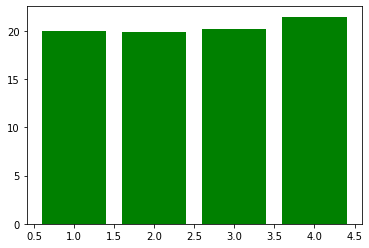

In [44]:
Salary=df_salary['Group_salary']
Ratio_salary=df_salary['ratio']
plt.bar(Salary,Ratio_salary,color='g')

Nhóm có thu nhập ước tính cao nhất có tỷ lệ rời bỏ cao nhất.

In [45]:
##Tỷ lệ rời bỏ theo nhóm lương ở nam giới
df_fe=df[df['Gender']=='Female']
df_salary_ex_fe=df_fe[df_fe['Exited']==1].groupby('Group_salary').agg('count')
df_salary_ex_fe.reset_index(inplace=True, drop=False)
df_salary_ex_fe=df_salary_ex_fe[['Group_salary','Exited',]]
df_salary_ex_fe

df_salary_inex_fe=df_fe[df_fe['Exited']==0].groupby('Group_salary').agg('count')
df_salary_inex_fe.reset_index(inplace=True, drop=False)
df_salary_inex_fe=df_salary_inex_fe[['Group_salary','Exited',]]
df_salary_inex_fe=df_salary_inex_fe.rename(columns={'Exited':'Inexited'})

df_salary_fe=pd.merge(df_salary_ex_fe, df_salary_inex_fe, how='outer', on='Group_salary')
df_salary_fe['ratio']=df_salary_fe['Exited']/(df_salary_fe['Exited']+df_salary_fe['Inexited'])*100
df_salary_fe

,Group_salary,Exited,Inexited,ratio
0,1,271,836,24.480578
1,2,270,842,24.280576
2,3,299,913,24.669967
3,4,299,813,26.888489


In [46]:
##Tỷ lệ rời bỏ theo nhóm lương ở nam giới
df_ma=df[df['Gender']=='Male']
df_salary_ex_ma=df_ma[df_ma['Exited']==1].groupby('Group_salary').agg('count')
df_salary_ex_ma.reset_index(inplace=True, drop=False)
df_salary_ex_ma=df_salary_ex_ma[['Group_salary','Exited',]]
df_salary_ex_ma

df_salary_inex_ma=df_ma[df_ma['Exited']==0].groupby('Group_salary').agg('count')
df_salary_inex_ma.reset_index(inplace=True, drop=False)
df_salary_inex_ma=df_salary_inex_ma[['Group_salary','Exited',]]
df_salary_inex_ma=df_salary_inex_ma.rename(columns={'Exited':'Inexited'})

df_salary_ma=pd.merge(df_salary_ex_ma, df_salary_inex_ma, how='outer', on='Group_salary')
df_salary_ma['ratio']=df_salary_ma['Exited']/(df_salary_ma['Exited']+df_salary_ma['Inexited'])*100
df_salary_ma

,Group_salary,Exited,Inexited,ratio
0,1,218,1128,16.196137
1,2,234,1191,16.421053
2,3,218,1125,16.232316
3,4,228,1115,16.976917


Nữ giới có mức lương cao thì có tỷ lệ rời bỏ cao hơn nhóm có mức lương thấp và cao hơn ở nam giới có cùng mức lương. Về tỷ lệ rời bỏ ở nam giới, không bị ảnh hưởng quá nhiều bởi mức lương ước tính.

# Detecting Outliers

In [336]:
def boxplot(df, column):
    df.boxplot(column)
    plt.grid(False)
    plt.show()

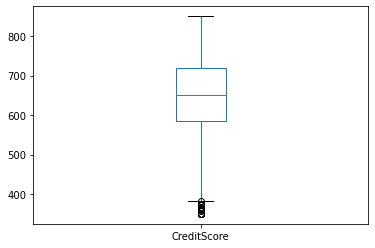

In [93]:
boxplot(df, 'CreditScore')

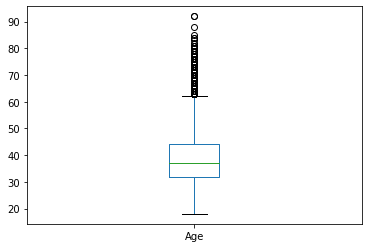

In [94]:
boxplot(df, 'Age')

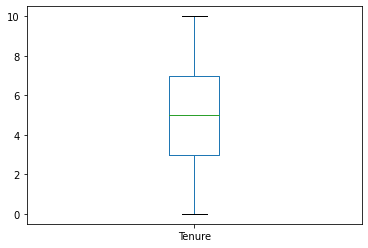

In [95]:
boxplot(df, 'Tenure')

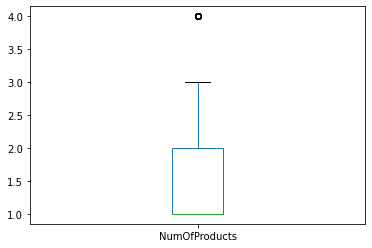

In [96]:
boxplot(df, 'NumOfProducts')

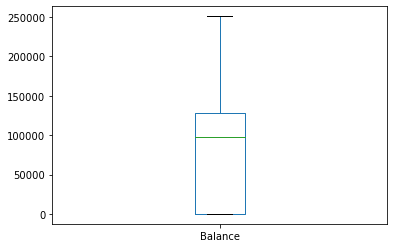

In [97]:
boxplot(df, 'Balance')

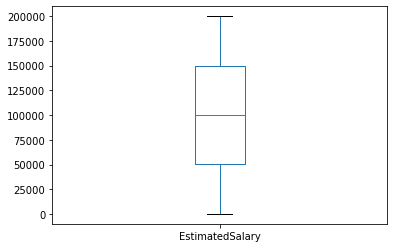

In [98]:
boxplot(df, 'EstimatedSalary')

# Handling Outliers

In [324]:
df_copy=df.copy()
df_copy

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Group_balance,Group_salary
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,3
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,2,3
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,4,3
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,2
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,2
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,2,3
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,0,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,2,2


In [326]:
def outliers(df_,ft):
    Q1=df[ft].quantile(0.25)
    Q3=df[ft].quantile(0.75)
    IQR = Q3-Q1
    lower=Q1 - 1.5*IQR
    upper=Q3 + 1.5*IQR
    outlier = df.index[(df[ft]<lower) | (df[ft]>upper)]
    return outlier

In [330]:
index_list=[]
for ft in ['CreditScore','Age','NumOfProducts']:
    index_list.extend(outliers(df_copy, ft))

In [332]:
len(index_list)

434

In [339]:
def remove(df,ls):
    #ls=sorted(set(ls))
    df=df.drop(ls)
    return df

In [340]:
df_cleaned=remove(df_copy,index_list)

In [341]:
df_cleaned.shape

(9568, 13)